# Importing Libraries

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer,classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Data Acquisition and Analysis

In [90]:
# Reading the dataframes 

df_test = pd.read_csv('obesitytest.csv')
df_train = pd.read_csv('obesitytrain.csv')

In [140]:
# Check shape of train dataframe 

df_train.shape

(19684, 19)

In [139]:
# Check shape of test dataframe 

df_test.shape

(13840, 18)

In [142]:
# Checking null values in train dataframe

df_train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64

In [143]:
# Checking null values in test dataframe

df_test.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
BMI                               0
dtype: int64

In [91]:
# Return first five rows of the train dataframe

df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [92]:
# Return first five rows of the test dataframe

df_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [93]:
# Get a concise summary of train dataframe

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [94]:
# Get a concise summary of test dataframe

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [95]:
# Add a new column 'uniques' and diplay unique values in each row 

df_test_uniques = df_test.apply(pd.unique).to_frame(name="Uniques")
df_train_uniques = df_train.apply(pd.unique).to_frame(name="Uniques")

# Concatenate the test_unique and train_unique dataframes side by side

result = pd.concat([df_test_uniques, df_train_uniques], axis=1)

# Display the result

print(result)

                                                                          Uniques  \
id                              [20758, 20759, 20760, 20761, 20762, 20763, 207...   
Gender                                                             [Male, Female]   
Age                             [26.899886, 21.0, 26.0, 20.979254, 19.799054, ...   
Height                          [1.848294, 1.6, 1.643355, 1.553127, 1.627396, ...   
Weight                          [120.644178, 66.0, 111.600553, 103.669116, 104...   
family_history_with_overweight                                          [yes, no]   
FAVC                                                                    [yes, no]   
FCVC                            [2.938616, 2.0, 3.0, 1.202075, 2.061969, 2.816...   
NCP                             [3.0, 1.0, 2.977909, 4.0, 2.256119, 1.281683, ...   
CAEC                                          [Sometimes, Always, Frequently, no]   
SMOKE                                                            

In [96]:
# Create data_summary dataframe

data_summary = pd.DataFrame()

# Analyze and populate data type, minimum, maximum, unique, missing & duplicated values etc

for column in df_train.columns:
    if df_train[column].dtype == 'object':
        data_summary[column] = {
            'dataType': df_train[column].dtype,
            'missingVals': df_train[column].isnull().sum(),
            'duplicateVals': df_train[column].duplicated().sum(),
            'uniqueVals': df_train[column].nunique(),
            'topValue': df_train[column].mode().iloc[0],
            'Frequency': df_train[column].value_counts().index[0]
        }
    else:
        data_summary[column] = {
            'dataType': df_train[column].dtype,
            'missingVals': df_train[column].isnull().sum(),
            'duplicateVals': df_train[column].duplicated().sum(),
            'uniqueVals': df_train[column].nunique(),
            'minVal': df_train[column].min(),
            'maxVal': df_train[column].max(),
            'average': df_train[column].mean(),
            'stdDeviation': df_train[column].std(),
        }

In [97]:
data_summary.drop(columns='id',inplace=True)

In [98]:
data_summary.transpose()

,dataType,missingVals,duplicateVals,uniqueVals,minVal,maxVal,average,stdDeviation
Gender,object,0,20756,2,NaN,NaN,NaN,NaN
Age,float64,0,19055,1703,14.0,61.0,23.841804,5.688072
Height,float64,0,18925,1833,1.45,1.975663,1.700245,0.087312
Weight,float64,0,18779,1979,39.0,165.057269,87.887768,26.379443
family_history_with_overweight,object,0,20756,2,NaN,NaN,NaN,NaN
FAVC,object,0,20756,2,NaN,NaN,NaN,NaN
FCVC,float64,0,19824,934,1.0,3.0,2.445908,0.533218
NCP,float64,0,20069,689,1.0,4.0,2.761332,0.705375
CAEC,object,0,20754,4,NaN,NaN,NaN,NaN
SMOKE,object,0,20756,2,NaN,NaN,NaN,NaN


# Data Visualization

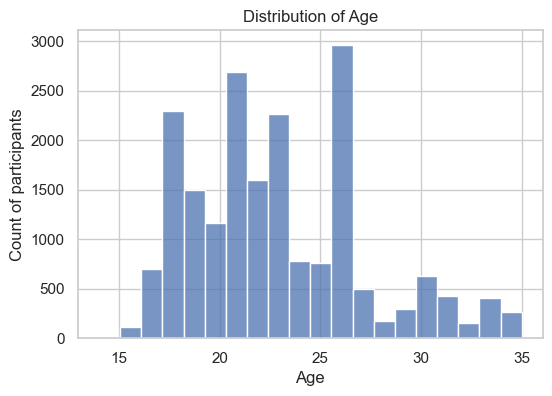

In [144]:
# Visualization of the distribution of age factor to understand the demographic

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

sns.histplot(df_train['Age'], bins=20, kde=False)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count of participants')
plt.show()


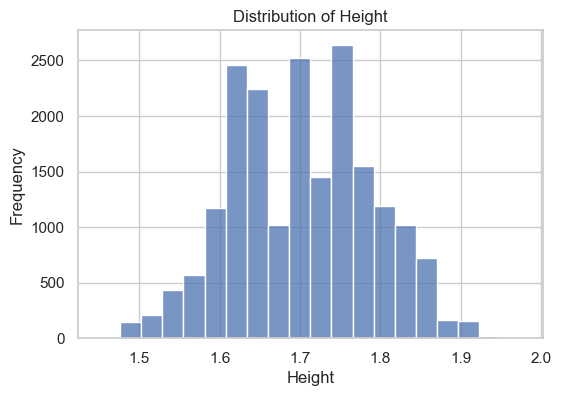

In [145]:
# Visualization of the distribution of height factor to understand the demographic

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.histplot(df_train['Height'], bins=20, kde=False)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

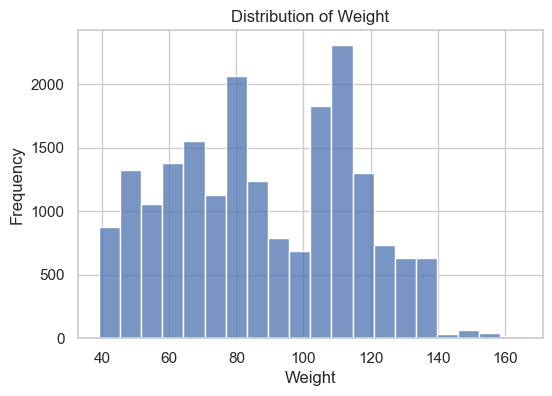

In [146]:
# Visualization of the distribution of weight factor to understand the demographic

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.histplot(df_train['Weight'], bins=20, kde=False)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

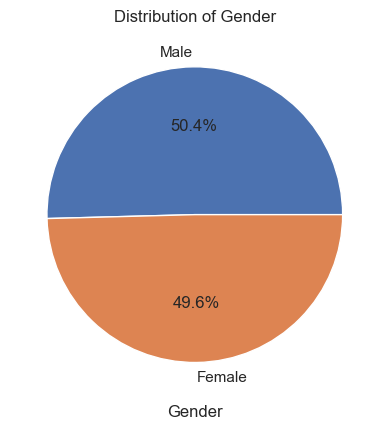

In [148]:
# Rendering pie chart for the Distribution of data in gender category

# Getting the counts for unique values in the 'Gender' column

gender_count = df_train['Gender'].value_counts()

# Extracting pie chart slice labels and converting to NumPy array for plotting

pie_chart_slice_labels = gender_count.index.to_numpy()  

# Creating the pie chart

custom_palette = sns.color_palette("husl", 2)
plt.pie(gender_count, labels=pie_chart_slice_labels, autopct="%1.1f%%")  
plt.xlabel('Gender')
plt.title('Distribution of Gender')
plt.show()

## Visualization of the distriution of the variable which is to be predicted 

plt.figure(figsize=(8, 6))
custom_palette = sns.color_palette("husl", 8)
sns.countplot(x='NObeyesdad', data=df_train)
plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=45)
plt.show()

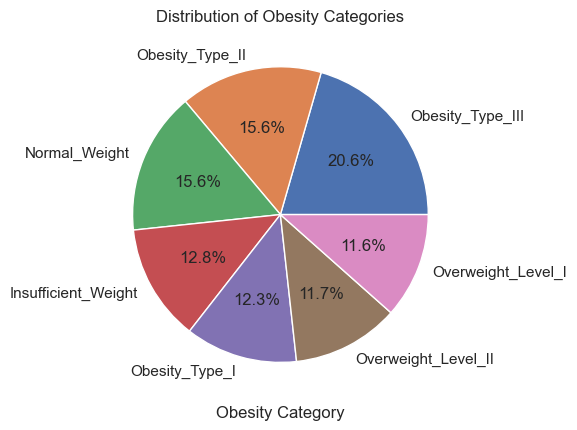

In [129]:
# Rendering pie chart for the Distribution of data in Obesity categories


# Getting the counts for unique values in the 'Obesity' column

obesity_counts = df_train['NObeyesdad'].value_counts()

# Extracting pie chart slice labels and converting to NumPy array for plotting

pie_chart_slice_labels = obesity_counts.index.to_numpy()  

# Creating the pie chart

custom_palette = sns.color_palette("husl", 8)
plt.pie(obesity_counts, labels=pie_chart_slice_labels, autopct="%1.1f%%")  
plt.xlabel('Obesity Category')
plt.title('Distribution of Obesity Categories')
plt.show()

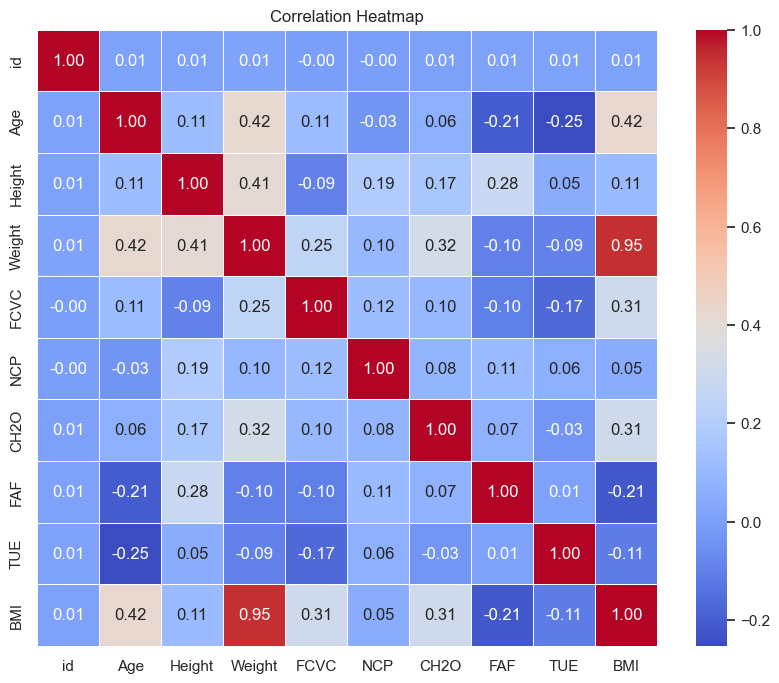

In [133]:
numerical_cols = df_train.select_dtypes(include=np.number)

# Compute the correlation matrix

correlation_matrix = numerical_cols.corr()

# Creating a correlation heatmap between weight and the target variable Nobeyesdad

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

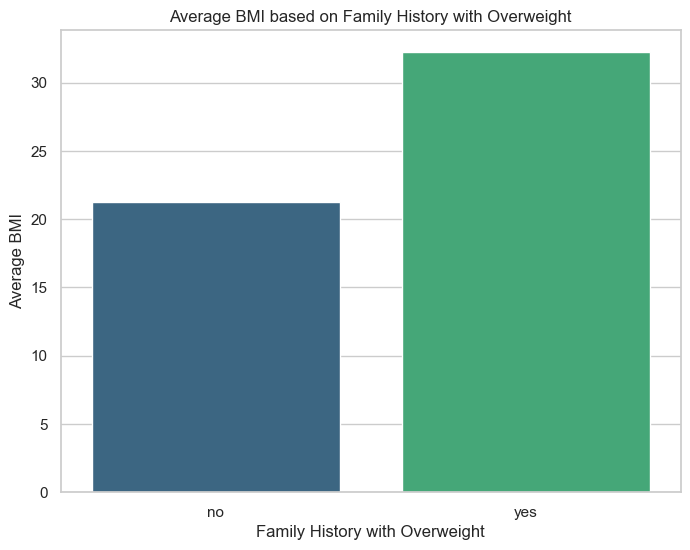

In [137]:
# Grouping data by 'family_history_with_overweight' and calculating mean BMI

bmi_by_family_history = df_train.groupby('family_history_with_overweight')['BMI'].mean().reset_index()

# Plotting stacked bar chart to illustrate the relationship between Family history with overweight and average BMI 

plt.figure(figsize=(8, 6))
sns.barplot(x='family_history_with_overweight', y='BMI', data=bmi_by_family_history, palette='viridis')
plt.title('Average BMI based on Family History with Overweight')
plt.xlabel('Family History with Overweight')
plt.ylabel('Average BMI')
plt.show()

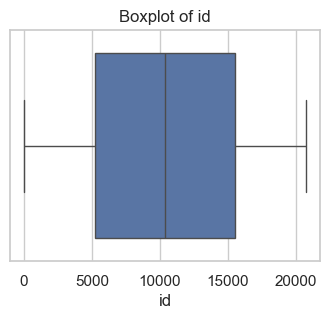

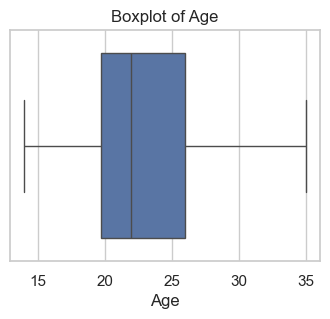

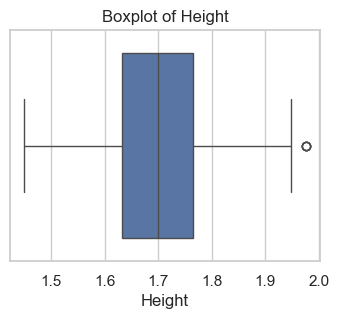

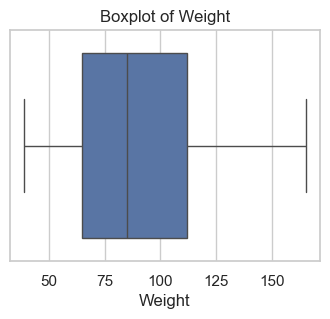

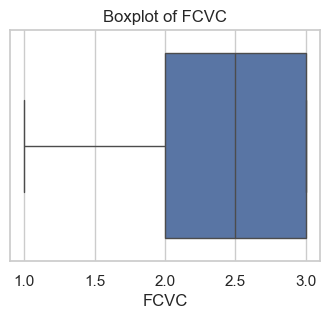

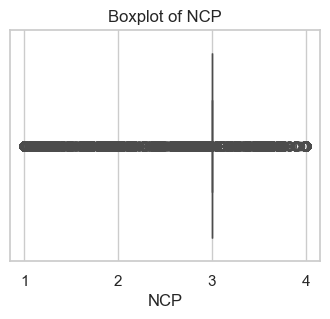

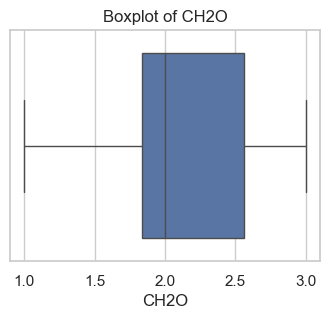

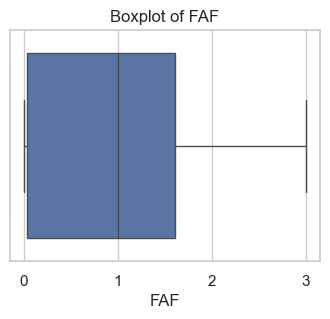

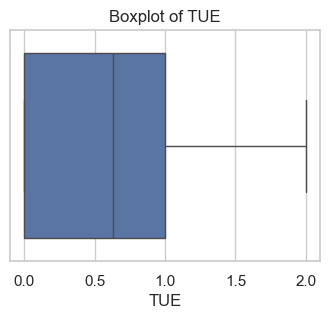

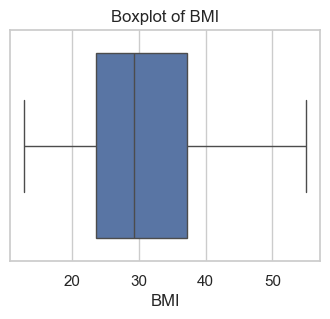

In [149]:
# Creating box plots for the rest of the columns 

columns = df_train.columns

for column_name in columns:
    if pd.api.types.is_numeric_dtype(df_train[column_name]): # Checking if the column values contain numerical data
        custom_palette = sns.color_palette("husl", 8)
        plt.figure(figsize=(4, 3))
        sns.boxplot(x=df_train[column_name])
        plt.title('Boxplot of ' + column_name)
        plt.show()

In [104]:
# As per the above diagrams 'Age' category has outliers 


#Calculating the Interquartile range

Q1 = df_train['Age'].quantile(0.25)
Q3 = df_train['Age'].quantile(0.75)
IQR = Q3 - Q1

# Defining the upper and lower bound for outliers 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding the number of outliers 

outliers_count = ((df_train['Age'] < lower_bound) | (df_train['Age'] > upper_bound)).sum()
print("Number of outliers in the Age column: ", outliers_count)

Number of outliers in the Age column:  1074


In [105]:
# Return the number of rows in age column

df_train['Age'].shape

(20758,)

In [106]:
# Removing outliers in the 'Age' category 

#Calculating the Interquartile range

Q1 = df_train['Age'].quantile(0.25)
Q3 = df_train['Age'].quantile(0.75)
IQR = Q3 - Q1

# Defining the upper and lower bound for outliers 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers

df_train = df_train[(df_train['Age'] >= lower_bound) & (df_train['Age'] <= upper_bound)]

In [107]:
# Calculate BMI

df_train['BMI'] = df_train['Weight'] / (df_train['Height'] ** 2)
df_test['BMI'] = df_test['Weight'] / (df_test['Height'] ** 2)

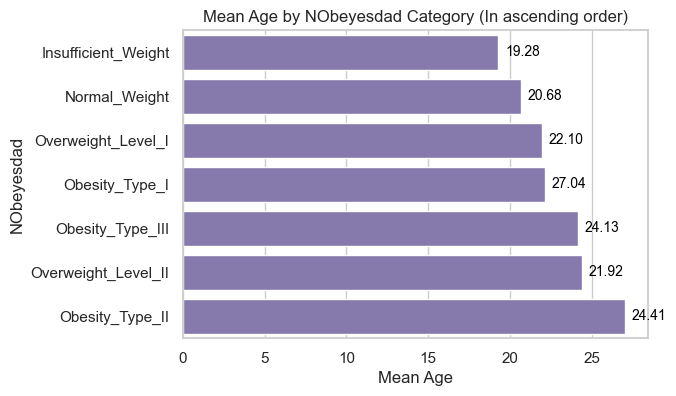

In [152]:
# Calculating mean age relative to 'NObeyesdad' category

mean_age_by_category = df_train.groupby('NObeyesdad')['Age'].mean().reset_index()

# Sorting the dataframe based on mean age in ascending order

mean_age_by_category.sort_values(by='Age', inplace=True)

# Creating a horizontal bar plot

plt.figure(figsize=(6, 4))
barplot = sns.barplot(data=mean_age_by_category, x='Age', y='NObeyesdad', orient='h')
color = ["m"]
sns.set_palette(sns.color_palette(color))

# Adding mean age values at the end of the bar

for index, row in mean_age_by_category.iterrows():
    plt.text(bar_positions.iloc[index], index, f'{row["Age"]:.2f}', color='black', va='center', fontsize=10)

plt.title('Mean Age by NObeyesdad Category (In ascending order)')
plt.xlabel('Mean Age')
plt.ylabel('NObeyesdad')
plt.show()

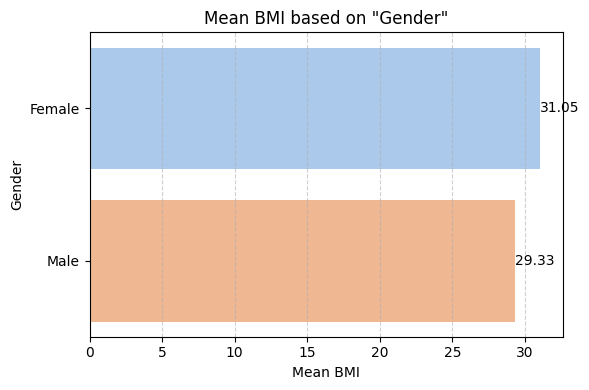

In [109]:
# Calculating mean BMI based on gender

mean_bmi_gender = df_train.groupby('Gender')['BMI'].mean().reset_index()

# Color palette for genders

colors = sns.color_palette('pastel')

# Creating horizontal bar plot

plt.figure(figsize=(6, 4))
barplot = sns.barplot(data=mean_bmi_gender, x='BMI', y='Gender', palette=colors)

# Adding value annotations

for index, row in mean_bmi_gender.iterrows():
    barplot.text(row['BMI'], index, f'{row["BMI"]:.2f}', color='black', va='center')

plt.xlabel('Mean BMI')
plt.ylabel('Gender')
plt.title('Mean BMI based on "Gender"')
plt.grid(axis='x', linestyle='--', alpha=0.6)  
plt.tight_layout()
plt.show()

# Data Preprocessing

In [110]:
# Defining x = feature matrix  and y = target variable 

X = df_train.drop(columns=['NObeyesdad']) 
y = df_train['NObeyesdad'] 

# Splitting data into train and test data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining columns as categorical and numerical 

categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

preprocessing = ColumnTransformer([
    ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('scaling', StandardScaler(), numerical_cols)
])

# Model Training

In [111]:
# Defining pipelines

pipelines = {
  "LogisticRegression": Pipeline([
      ('preprocessing', preprocessing),
      ('lr', LogisticRegression())
  ]),
  "RandomForest": Pipeline([
      ('preprocessing', preprocessing),
      ('rf', RandomForestClassifier())
  ]),
}

# Reducing hyperparameter search space

param_grids = {
  "LogisticRegression": {
    'lr__C': [0.1, 1.0],
    'lr__penalty': ['l1', 'l2']
  },
  "RandomForest": {
      'rf__n_estimators': [25, 50],  
      'rf__max_depth': [None, 2],      
  }
}

# Scoring metrics

scoring = {
  "accuracy": make_scorer(accuracy_score)
}

# Hyperparameter tuning and model selection 

best_model = None
best_score = 0

for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], scoring=scoring, cv=3, refit='accuracy', n_jobs=-1)  
    grid_search.fit(X_train, y_train)
  
  # Best model and its score
    
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_

# Evaluation of the best model on the testing set

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
 
print("Best Model:", best_model)
print("Accuracy of Best Model : ", accuracy)

Best Model: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one_hot_encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS']),
                                                 ('scaling', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE'])])),
                ('rf', RandomForestClassifier(n_estimators=50))])
Accuracy of Best Model :  0.889255778511557


In [112]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.92      0.92       521
      Normal_Weight       0.83      0.87      0.85       621
     Obesity_Type_I       0.87      0.87      0.87       496
    Obesity_Type_II       0.97      0.98      0.97       580
   Obesity_Type_III       1.00      0.99      1.00       788
 Overweight_Level_I       0.78      0.73      0.76       452
Overweight_Level_II       0.77      0.77      0.77       479

           accuracy                           0.89      3937
          macro avg       0.88      0.88      0.88      3937
       weighted avg       0.89      0.89      0.89      3937



In [113]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Confusion Matrix:
[[478  40   0   1   0   2   0]
 [ 32 540   2   0   0  35  12]
 [  1   1 433  13   2   7  39]
 [  0   0   9 568   0   0   3]
 [  1   1   2   0 784   0   0]
 [  3  55   7   0   0 330  57]
 [  1  17  42   4   0  47 368]]


In [114]:
# Predict on the test data using the best model

y_pred_test = best_model.predict(df_test)

# Create the submission dataframe with only "id" and "NObeyesdad" columns

submission_df = pd.DataFrame({
    'id': df_test['id'],  # 
    'NObeyesdad': y_pred_test
})

# Save the submission dataframe as a CSV file

submission_df.to_csv('Submission.csv', index=False)